## Bank Marketing Dataset Analysis and Decision Tree Classification
### Dataset Columns:

age: Age of the client.

job: Type of job.

marital: Marital status.

education: Level of education.

default: Whether the client has credit in default.

housing: Whether the client has housing loan.

loan: Whether the client has personal loan.

contact: Communication type.

month: Last contact month of year.

day_of_week: Last contact day of the week.

duration: Last contact duration, in seconds.

campaign: Number of contacts performed during this campaign for this client.

pdays: Number of days that passed by after the client was last contacted from a previous campaign.

previous: Number of contacts performed before this campaign for this client.

poutcome: Outcome of the previous marketing campaign.

emp.var.rate: Employment variation rate.

cons.price.idx: Consumer price index.

cons.conf.idx: Consumer confidence index.

euribor3m: Euribor 3 month rate.

nr.employed: Number of employees.

y:  Indicates whether the client subscribed to a term deposit after a marketing campaign. 1 or 'yes': Client subscribed to a term deposit.0 or 'no': Client did not subscribe to a term deposit.

## Code Description:
This code analyzes a bank marketing dataset to predict client subscription to a term deposit using a decision tree classifier. It loads and inspects the data, preprocesses it for modeling, trains the classifier, evaluates its performance, and visualizes the decision-making process with a tree diagram.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Display the first few rows of the dataset
display(df.head())



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Display basic information about the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None

In [4]:
# Display summary statistics
summary = df.describe(include='all').transpose()
display(summary)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
display(missing_values)

Series([], dtype: int64)

In [6]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [7]:
# Separate features and target variable
X = df.drop(columns=['y'])
y = df['y']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.89


In [9]:
# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report['support'] = df_report['support'].astype(int)
styled_report = df_report.style.background_gradient(cmap='coolwarm').format({'precision': '{:.2f}', 'recall': '{:.2f}', 'f1-score': '{:.2f}'})
display(styled_report)

,precision,recall,f1-score,support
0,0.94,0.94,0.94,10968
1,0.51,0.51,0.51,1389
accuracy,0.89,0.89,0.89,0
macro avg,0.72,0.73,0.72,12357
weighted avg,0.89,0.89,0.89,12357


In [10]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
styled_conf_matrix = df_conf_matrix.style.background_gradient(cmap='coolwarm')
display(styled_conf_matrix)

,Predicted No,Predicted Yes
Actual No,10275,693
Actual Yes,675,714


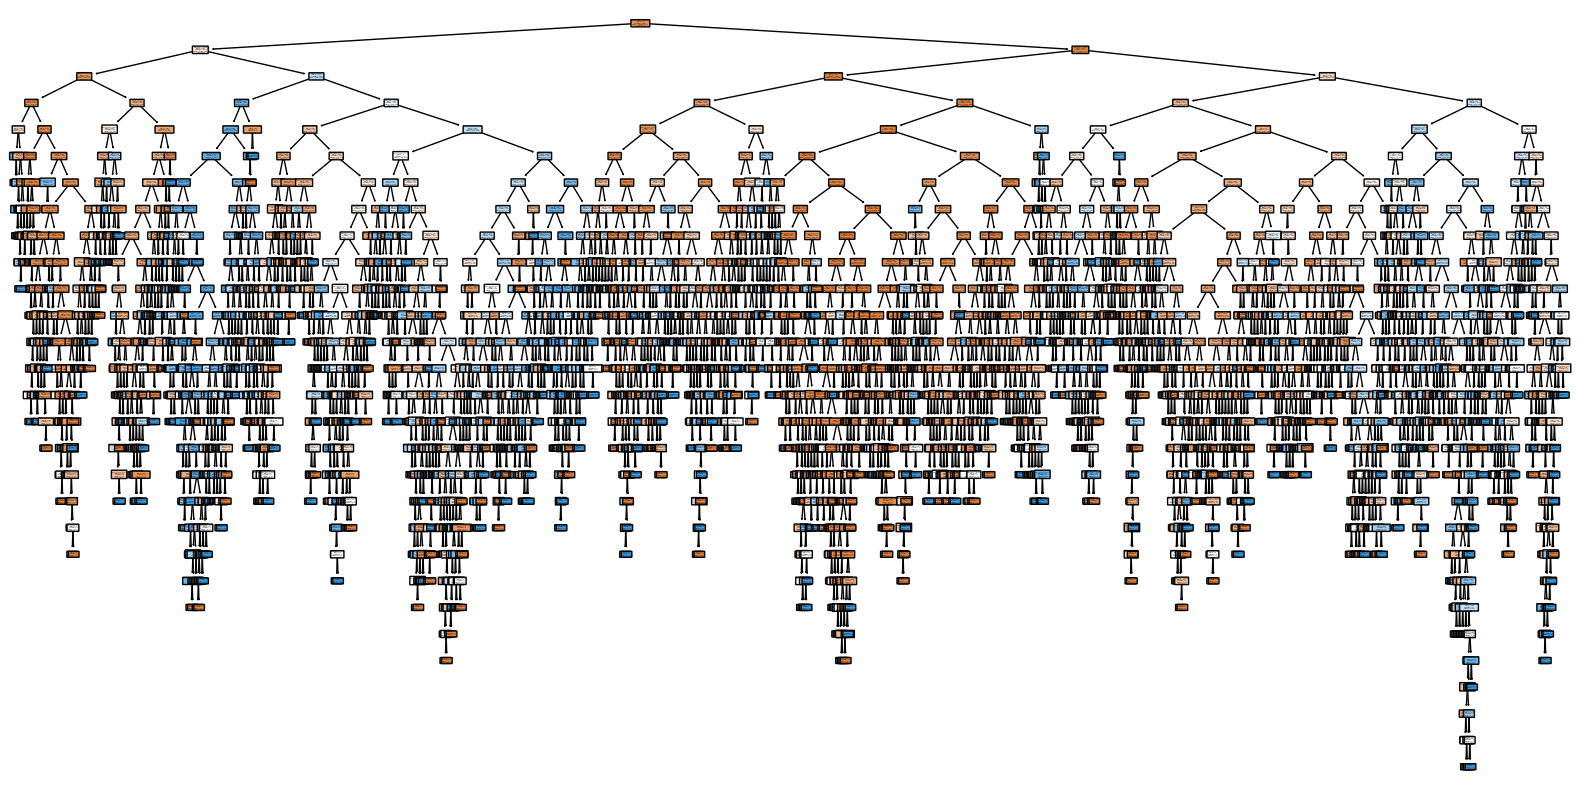

In [11]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()
